# Market Data Simulator

Do you ever need some market data tp try something out?  I do quite often.  About half the time I go to one of the marketplaces for data that are becoming super-super-useful in this regard, and about half the time I'll craft some data to fit the purpose.  This notebook crafts market data with a configurable look-and-feel for a given time range.  Therein lies the intent of the notebook, in this case I want data that looks and feels like FX market data and, in the first instance, I don't care about the properties of the data as much as I care about having a reasonable frequency of ticks for a given time range.

The end result is data that looks fine when plotted, is fine to analyze and quick to produce (6 months data in ~45 seconds).

Feel free to have fun...

In [119]:
import random
import datetime
import pandas as pd

In [120]:
# Starting point for the mid price.
STARTING_MID = 150.0

# Minimum value for the mid price.  
# N.B. If the random movement of the mid price falls below this minimum 
# we'll reset it to the minimum which will effectively make it bounce 
# off the minimum.
MIN_MID = 50.0

# Starting point for the spread.
STARTING_SPREAD = 2.0

# Minimum and maximum values for the spread.
# N.B. If the random movement of the spread passes the minimum or maximum
# we'll resent to the appropriate value which will effectively make it bounce
# off these boundaries.
MIN_SPREAD = 0.01
# Maximum spread should be greater than STARTING_SPREAD
MAX_SPREAD = 3.0

TIME_FORMAT = '%m/%d/%y %H:%M:%S.%f'

# Start and end time.
START_TIME = '1/1/15 00:00:00.000'
FINISH_TIME = '1/2/15 00:00:00.000'

# Time deltas.  At each point we'll choose a delta from this list.
# I chose this style of randomization to control the frequency of the ticks such 
# that the data looks more EBS or Reuters style than it does Currenex style.
# This style makes manipulation/analysis somewhat easier.
TIME_DELTAS = [
  datetime.timedelta(milliseconds=1000), 
  datetime.timedelta(milliseconds=2000), 
  datetime.timedelta(milliseconds=4000), 
  datetime.timedelta(milliseconds=6000), 
  datetime.timedelta(milliseconds=8000), 
  datetime.timedelta(milliseconds=10000)]

In [121]:
start_datetime = datetime.datetime.strptime(START_TIME, TIME_FORMAT)
finish_datetime = datetime.datetime.strptime(FINISH_TIME, TIME_FORMAT)

current_mid = STARTING_MID
current_spread = STARTING_SPREAD

# The bid and ask are calculated from the spread, equidistant from the mid with bid lower than ask.
current_bid = current_mid - (current_spread/2)
current_ask = current_mid + (current_spread/2)

current_datetime = start_datetime

market_data = pd.DataFrame(columns=['datetime', 'mid', 'spread', 'bid', 'ask'])

# Using a list of rows (that get appended to the dataframe at the end) because it's much faster than appending each time.
rows_list = []
rows_list.append(
  {'datetime': current_datetime,
   'mid': current_mid,
   'spread': current_spread,
   'bid': current_bid,
   'ask': current_ask
  }
)

while True:
  
  # Choose a random time increment from the list of deltas.
  time_delta = random.choice(TIME_DELTAS)
  current_datetime = current_datetime + time_delta
  
  # If the incremented datetime is beyond the finish datetime break out of the loop
  if current_datetime > finish_datetime:
    break
  
  # Choose a random change to the mid.
  mid_delta = random.normalvariate(0, 0.1)
  current_mid = current_mid + mid_delta
  
  # Reset the mid to the minimum if necessary.
  if current_mid < MIN_MID:
    current_mid = MIN_MID
  
  # Choose a random change to the spread.
  spread_delta = random.normalvariate(0, 0.1)
  current_spread = current_spread + spread_delta
  
  # Reset the spread to the min/max if necessary.
  if current_spread < MIN_SPREAD:
    current_spread = MIN_SPREAD
  if current_spread > MAX_SPREAD:
    current_spread = MAX_SPREAD
  
  current_bid = current_mid - (current_spread/2)
  current_ask = current_mid + (current_spread/2)
  
  rows_list.append(
    {'datetime': current_datetime,
     'mid': current_mid,
     'spread': current_spread,
     'bid': current_bid,
     'ask': current_ask
    }
  )
  
# Append all rows to the dataframe and set the index at the datetime.
market_data = market_data.append(rows_list)
market_data = market_data.set_index('datetime')

In [122]:
market_data.describe()

,mid,spread,bid,ask
count,16692.000000,16692.000000,16692.000000,16692.000000
mean,149.704732,1.378301,149.015582,150.393883
std,4.300030,0.850435,4.375896,4.265403
min,141.555374,0.010000,140.190357,142.891608
25%,146.636719,0.647490,145.893731,147.305358
50%,149.189213,1.352856,148.524332,149.823387
75%,151.417201,2.032018,151.057877,151.836471
max,160.569545,3.000000,160.273889,161.879331


In [123]:
market_data[:-10:-1]

,mid,spread,bid,ask
datetime,,,,
2015-01-01 23:59:55,157.090754,0.206379,156.987565,157.193944
2015-01-01 23:59:49,156.974985,0.071616,156.939177,157.010793
2015-01-01 23:59:45,156.999962,0.208395,156.895764,157.104159
2015-01-01 23:59:43,157.025385,0.153155,156.948807,157.101962
2015-01-01 23:59:39,156.977629,0.016801,156.969229,156.986030
2015-01-01 23:59:29,156.903222,0.010000,156.898222,156.908222
2015-01-01 23:59:21,156.932941,0.010000,156.927941,156.937941
2015-01-01 23:59:19,156.946665,0.022159,156.935586,156.957744
2015-01-01 23:59:17,156.739075,0.133618,156.672266,156.805884


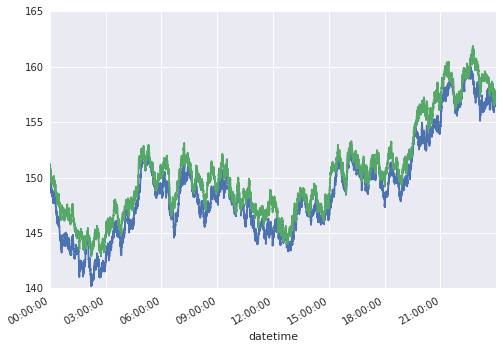

In [124]:
market_data.bid.plot()
market_data.ask.plot()

In [125]:
print '''Copyright 2015, Google, Inc.
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at 
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.'''

Copyright 2015, Google, Inc.
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at 
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
